In [244]:
import numpy as np
import nashpy as nash
import random
import matplotlib.pyplot as plt

In [283]:
class Population:
    def __init__(self, demographics):
        self.demos = demographics
        self.pop = np.shape(demographics)[0]
        _, self.props = np.unique(self.demos, return_counts=True)
        self.species = {"R" : self.props[0], "P" : self.props[1], "S" : self.props[2]}

    def combat(self):
        pop_dict = {'R' : 0, 'P' : 0, 'S' : 0}
        c = self.demos
        np.random.shuffle(c)
        if self.pop % 2 == 1:
            pop_dict[c[-1]] += 1
            del c[-1]
        a, b = np.split(c, 2)

        for i, _ in enumerate(a):
            if a[i] == b[i]:
                pop_dict[a[i]] += 1
                pop_dict[b[i]] += 1
            elif (a[i] == 'R') and (b[i] == 'S'):
                pop_dict[a[i]] += 2
            elif (a[i] == 'S') and (b[i] == 'P'):
                pop_dict[a[i]] += 2
            elif (a[i] == 'P') and (b[i] == 'R'):
                pop_dict[a[i]] += 2
            else:
                pop_dict[b[i]] += 2
        
        new_pop = ['R'] * pop_dict['R'] + ['P'] * pop_dict['P'] + ['S'] * pop_dict['S']
        self.demos = np.array(new_pop)
        self.species = pop_dict
    
    def mutate(self, mutation_param):
        new_demos = []
        for x in self.demos:
            y = random.randint(1, mutation_param)
            if y == 1:
                z = random.randint(1, 2)
                if x == "R":
                    if z == 1:
                        x = "P"
                    else:
                        x = "S"
                elif x == "P":
                    if z == 1:
                        x = "S"
                    else:
                        x = "R"
                else:
                    if z == 1:
                        x = "R"
                    else:
                        x = "P"
            new_demos.append(x)
        self.demos = np.array(new_demos)

In [292]:
def simulate_population(initial_pop, mutation_param, generations):
    P = Population(initial_pop)
    rock_lst = []
    paper_lst = []
    scissors_lst = []
    for _ in range(generations):
        P.combat()
        P.mutate(mutation_param)
        rock_lst.append(P.species["R"])
        paper_lst.append(P.species["P"])
        scissors_lst.append(P.species["S"])
    plt.plot(rock_lst, label='rock')
    plt.plot(paper_lst, label='paper')
    plt.plot(scissors_lst, label='scissors')
    plt.show()

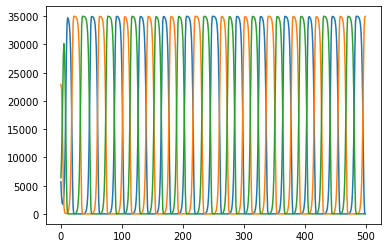

: 

In [296]:
init_pop = ["R"] * 10000 + ["P"] * 20000 + ["S"] * 5000
init_pop = np.array(init_pop)
simulate_population(init_pop, 10000, 500)

In [26]:
a = np.array([2,3,4,5,6,1,2,34,9])
a, b = np.array_split(a, 2)
b 

array([ 1,  2, 34,  9])